<a href="https://colab.research.google.com/github/sivanitzhaki/NLP-project-Toxic-Comment-Classification/blob/main/Toxic_Comment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Toxic Comment Classification**

Identify and classify toxic online comments

# **0. Installations and imports**

In [ ]:
#installation

!pip install gradio jinja2
!pip install iterative-stratification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 

In [ ]:
#imports:
import os
import shutil

import pandas as pd
import numpy as np
from string import digits

# plots and graphs libraries:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics import accuracy_score as ac_score

import keras
import keras.utils
from keras import utils as np_utils
from keras.models import Sequential
from keras.layers import Dropout, Conv1D, Flatten, Dense, Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard

from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
from sklearn.utils import indexable, _safe_indexing
from sklearn.utils.validation import _num_samples
from sklearn.model_selection._split import _validate_shuffle_split
from itertools import chain

import re

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix as mcm
from sklearn.metrics import ConfusionMatrixDisplay as mat_display

from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from keras.layers import LSTM

import gradio as gr
import operator

import spacy

from sklearn.utils import resample
from sklearn.utils import shuffle

tf.get_logger().setLevel('ERROR')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# set the random seed
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# **1. EDA**

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/DL Project/Toxic Comment Classification/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/DL Project/Toxic Comment Classification/test.csv')
df_test_labels = pd.read_csv('/content/drive/My Drive/DL Project/Toxic Comment Classification/test_labels.csv')

In [ ]:
df_train.shape

(159571, 8)

In [ ]:
df_test.shape

(153164, 2)

In [ ]:
df_train.head(15)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Let's check the correlations between the differnt labels

In [ ]:
labels =['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']
labels_lst =['Toxic', 'Severe Toxic' , 'Obscene' , 'Threat' , 'Insult' , 'Identity Hate']

In [ ]:
data = df_train[labels]

<AxesSubplot:title={'center':'Correlation of labels'}>

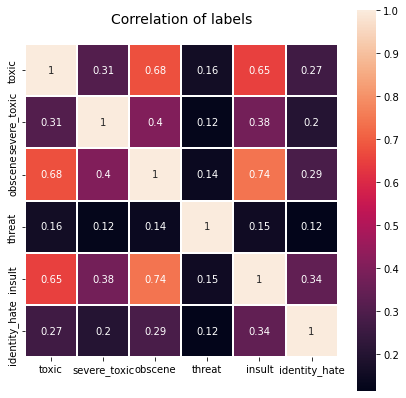

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Correlation of labels',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,#cmap=colormap,
           linecolor='white',annot=True)

Is the dataset balanced? Let's show toxic vs. non-toxic comments in the dataset

In [ ]:
# count toxic comments
rowSums = df_train.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
non_toxic = multiLabel_counts.iloc[0]
toxic = df_train.shape[0] -non_toxic

print("The data set contains", toxic, "toxic comments and", non_toxic, "non-toxic labels.")

The data set contains 16225 toxic comments and 143346 non-toxic labels.


We can see that overall, most of the comments are legitimate and the toxic ones are not very common. We'll have to consider this when splitting the data and training it.

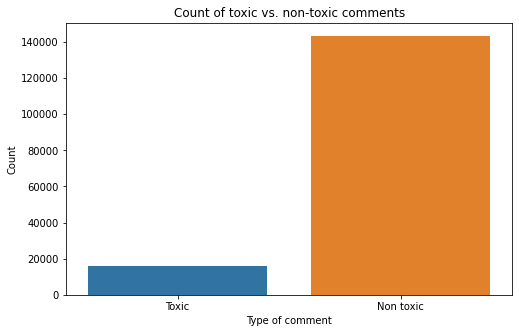

In [ ]:
toxic_dict = {"Toxic": toxic, "Non toxic": non_toxic}

df_plot = pd.DataFrame(toxic_dict.items())
plt.figure(figsize=(8,5))
ax = sns.barplot(x=0, y=1, data=df_plot)
ax.set(xlabel = 'Type of comment', ylabel='Count', title='Count of toxic vs. non-toxic comments')
plt.show()

Let's check how many labels we have for each type of toxicity:

In [ ]:
def labels_dict(df):
  # create dictionary
  dic = dict.fromkeys(list(df.columns)[2:], 0)
  # count toxicity levels
  for type in dic:
    dic[type] = df[type].sum()
  return dic

In [ ]:
toxicity_levels = labels_dict(df_train)
toxicity_levels

{'toxic': 15294,
 'severe_toxic': 1595,
 'obscene': 8449,
 'threat': 478,
 'insult': 7877,
 'identity_hate': 1405}

In [ ]:
def plot_toxic_levels(dic):
  # sort dict by values
  levels_sorted = dict(sorted(toxicity_levels.items(), key=operator.itemgetter(1),reverse=True))

  # plot
  df_plot = pd.DataFrame(levels_sorted.items())
  plt.figure(figsize=(8,5))
  ax = sns.barplot(x=0, y=1, data=df_plot)
  ax.set(xlabel = 'Type of toxic comment', ylabel='Count', title='Count of toxic comments types')
  plt.show()

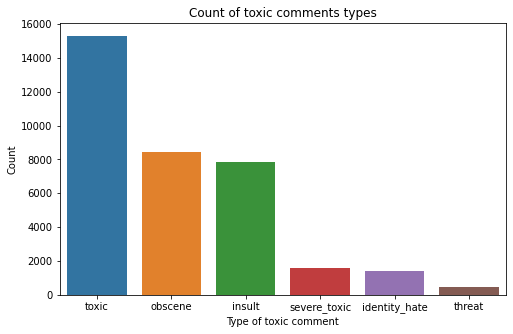

In [ ]:
plot_toxic_levels(toxicity_levels)

Comments having multiple labels


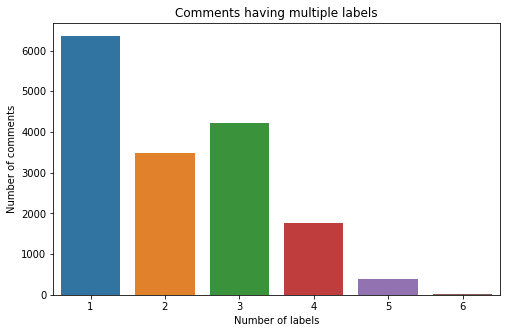

In [ ]:
# count multilabels
multiLabel_counts = multiLabel_counts.iloc[1:]

# set plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)
ax.set(xlabel = 'Number of labels', ylabel='Number of comments', title='Comments having multiple labels')
plt.show()

We can see that most of the toxic comments contain 1-3 types of toxicity.

Let's look at few examples:

In [ ]:
for i in range(0,6):
  print(df_train.iloc[i, 1])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want 

Most frequent words in the processed dataset

In [ ]:
# download stopwords to remove them from the graph
nltk.download('stopwords')

stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.append('im')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


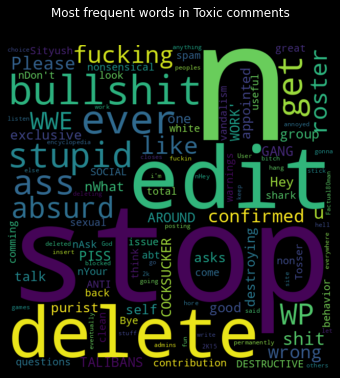

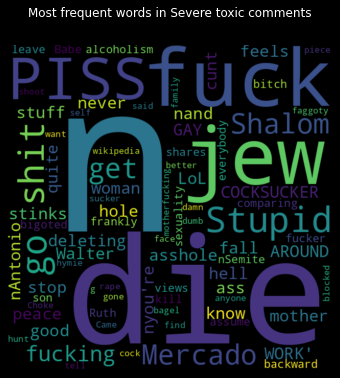

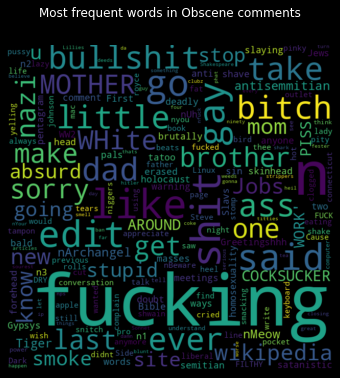

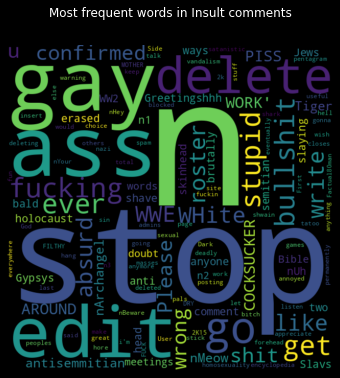

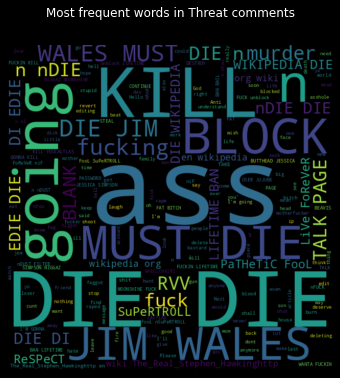

In [ ]:
def word_plot(column,text):

    comments = df_train['comment_text'].loc[column == 1].values     # sort by toxicity

    word_cloud = WordCloud( width = 640, height = 640, background_color = 'black',
                stopwords = stopword_list).generate(str(comments))     # stopwords are a,an,the

    fig = plt.figure( figsize = (8, 5), facecolor = 'k', edgecolor = 'k')
    plt.subplot()
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.suptitle("Most frequent words in " +  text , y = 1.06,color = "white")
    plt.tight_layout(pad = 0)
    plt.axis('off')
    plt.show()

word_plot(df_train['toxic'], "Toxic comments")
word_plot(df_train['severe_toxic'],"Severe toxic comments")
word_plot(df_train['obscene'],"Obscene comments")
word_plot(df_train['insult'],"Insult comments")
word_plot(df_train['threat'],"Threat comments")

# **2. Data preprocessing**

Creating new column named "total_classes" which will show total no. of classes comment belongs to.
If we take sum of all labels we can tell how many classes comment belong to.
For example, if comment belongs to "toxic" and "threat" then the sum will be 2. This way we can differentiate between toxic and non-toxic comments.

In [ ]:
df_train["total_classes"] = df_train.iloc[:,2:8].apply(lambda x: sum(x), axis=1)
df_test["total_classes"] = df_test.iloc[:,2:8].apply(lambda x: sum(x), axis=1)

df_train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,total_classes
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0


In [ ]:
df_train[df_train['total_classes'] > 0]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,total_classes
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,1
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,1
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,4
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1,4
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0,2
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0,3
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0,2


**NLP preprocessing**

In [ ]:
# Change letters to lower case
def lower_case(text):
    return text.lower()

# remove web links
def clean_url(text):
  text = text.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
  return text

# Removing special characters
def remove_special_characters(text):
    pattern = r'[^\w\s]+'
    text = re.sub(pattern,'',text)
    return text

# Removing the brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Define function for removing newline characters
def remove_newline_characters(text):
    return text.replace('\n',' ')

# Define function for removing numbers using str.translate
def remove_numbers(text):
    remove_nums = str.maketrans('', '', digits) #creating a dict for translate
    text = text.translate(remove_nums)
    return text

def remove_extra_space(text):
    pattern = r"\s\s+"
    text = re.sub(pattern,' ',text)
    return text

# Removing the noisy text
def clean_text(text):
    text = lower_case(text)
    text = clean_url(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    text = remove_newline_characters(text)
    text = remove_numbers(text)
    text = remove_extra_space(text)
    return text

In [ ]:
# Apply function on comment column
df_train['comment_text'] = df_train['comment_text'].apply(clean_text)
df_test['comment_text'] = df_test['comment_text'].apply(clean_text)

In [ ]:
df_train['comment_text']

0         explanation why the edits made under my userna...
1         daww he matches this background colour im seem...
2         hey man im really not trying to edit war its j...
3          more i cant make any real suggestions on impr...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566    and for the second time of asking when your vi...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570     and i really dont think you understand i came...
Name: comment_text, Length: 159571, dtype: object

**Remove stopwords and tokenize**

The most common words in comments:

In [ ]:
vocabulary = nltk.FreqDist()

# create frequency dictionary
for comment in df_train['comment_text']:
    words = comment.split()
    vocabulary.update(words)
for word, frequency in vocabulary.most_common(200):
    print(f'{word};{frequency}')

the;495012
to;296622
of;223664
and;222181
a;214700
you;204459
i;200545
is;175827
that;154195
in;144045
it;129561
for;102362
this;96812
not;93256
on;89336
be;83281
as;77200
have;72129
are;71840
your;63182
with;59455
if;58245
article;55403
was;54435
or;52172
but;50731
page;45577
my;45463
an;44344
from;41362
by;40992
do;39710
at;39335
about;37034
me;36868
so;35906
wikipedia;35579
can;33978
what;33722
there;31863
talk;31289
all;31197
has;30688
will;30401
please;29584
would;29199
its;29194
no;28602
one;28054
just;27702
like;27688
they;27170
he;26190
dont;26087
which;25221
any;25096
been;24952
should;23651
more;23345
we;23155
some;22536
other;22284
who;21783
see;21465
here;21405
also;20536
his;20164
think;20032
im;19464
because;19104
know;18984
how;18572
am;18343
people;17690
why;17670
articles;17520
edit;17502
only;17433
up;17008
out;16998
when;16488
were;16430
use;16318
then;16099
may;15558
time;15398
did;14836
them;14806
now;14592
being;14444
their;14268
than;13869
thanks;13780
even;13369

In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer = ToktokTokenizer()

In [ ]:
# Removing the stopwords
from tqdm.notebook import tqdm
tqdm.pandas()

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Apply function on review column
df_train['comment_text'] = df_train['comment_text'].progress_apply(remove_stopwords)
df_test['comment_text'] = df_test['comment_text'].progress_apply(remove_stopwords)


  0%|          | 0/159571 [00:00<?, ?it/s]

  0%|          | 0/153164 [00:00<?, ?it/s]

**Lemmatization**

In [ ]:
#trying Spacy lemmatizer, because nltk didn't work well enough

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
df_train['spacy_lem'] = df_train['comment_text'].apply(lambda row: " ".join([x.lemma_ for x in nlp(row)]))
df_test['spacy_lem'] = df_test['comment_text'].apply(lambda row: " ".join([x.lemma_ for x in nlp(row)]))

In [ ]:
df_train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,total_classes,spacy_lem
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,explanation edit make username hardcore metall...
1,000103f0d9cfb60f,daww matches background colour seemingly stuck...,0,0,0,0,0,0,0,daww match background colour seemingly stick t...
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,hey man really try edit war guy constantly rem...
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0,0,can not make real suggestion improvement wonde...
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,0,sir hero chance remember page that s
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0,0,second time ask view completely contradict cov...
159567,ffea4adeee384e90,ashamed horrible thing put talk page,0,0,0,0,0,0,0,ashamed horrible thing put talk page
159568,ffee36eab5c267c9,spitzer umm theres actual article prostitution...,0,0,0,0,0,0,0,spitzer umm there s actual article prostitutio...
159569,fff125370e4aaaf3,looks like actually put speedy first version d...,0,0,0,0,0,0,0,look like actually put speedy first version de...


In [ ]:
#to save runtime next time we want to run the model, we will export the df after the lemmatization
df_train.to_csv(os.path.join(os.getcwd(), 'parsed_train.csv'))
df_test.to_csv(os.path.join(os.getcwd(), 'parsed_test.csv'))

In [ ]:
df_train_parsed = pd.read_csv('/content/drive/My Drive/DL Project/Toxic Comment Classification/parsed_train.csv')
df_test_parsed = pd.read_csv('/content/drive/My Drive/DL Project/Toxic Comment Classification/parsed_test.csv')

In [ ]:
df_train_parsed.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,total_classes,spacy_lem
0,0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,explanation edit make username hardcore metall...
1,1,000103f0d9cfb60f,daww matches background colour seemingly stuck...,0,0,0,0,0,0,0,daww match background colour seemingly stick t...
2,2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,hey man really try edit war guy constantly rem...
3,3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0,0,can not make real suggestion improvement wonde...
4,4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,0,sir hero chance remember page that s


In [ ]:
# To remove all comments with "-1" as labels, we need to concatenate the dataframes first, and then to remove all the rows where the label is "-1".

test_labels = df_test_labels[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
test_pd = pd.concat([df_test_parsed.set_index('id'),df_test_labels.set_index('id')], axis=1, join='inner')
test_pd = test_pd[['spacy_lem',	'toxic',	'severe_toxic', 'obscene',	'threat', 'insult', 'identity_hate']]
test_pd.drop(test_pd[test_pd.toxic == -1].index, inplace = True)

In [ ]:
x_test = test_pd['spacy_lem']
y_test = test_pd[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]

We want to try downsampling to handle unbalanced data. The method gave lower performance, thus we will not be using it.

In [ ]:
toxic_comments = df_train_parsed[df_train_parsed['total_classes']>0]

In [ ]:
non_toxic_comments = df_train_parsed[df_train_parsed['total_classes']==0]

In [ ]:
non_toxic_downsample = resample(non_toxic_comments,
             replace=True,
             n_samples=toxic_comments.shape[0],
             random_state=42)

print(non_toxic_downsample.shape)

(16225, 11)


0    16225
1     6360
3     4209
2     3480
4     1760
5      385
6       31
Name: total_classes, dtype: int64


<AxesSubplot:ylabel='Type'>

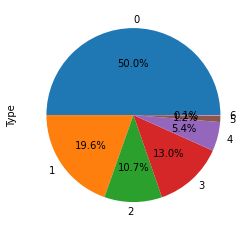

In [ ]:
data_downsampled = pd.concat([non_toxic_downsample, toxic_comments])
data_downsampled = shuffle(data_downsampled)
print(data_downsampled["total_classes"].value_counts())

data_downsampled.groupby('total_classes').size().plot(kind='pie',
                                       y = "total_classes",
                                       label = "Type",
                                       autopct='%1.1f%%')

**Vectorizing**

Separate the comment field data and outcome labels

In [ ]:
data_labels = df_train_parsed[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(data_labels.head())

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0


In [ ]:
comments = df_train_parsed['spacy_lem']
comments.head()

0    explanation edit make username hardcore metall...
1    daww match background colour seemingly stick t...
2    hey man really try edit war guy constantly rem...
3    can not make real suggestion improvement wonde...
4                 sir hero chance remember page that s
Name: spacy_lem, dtype: object

# **3. Train-test-valdiation split**

In [ ]:
# this function uses the algorithm from 'Sechidis K., Tsoumakas G., Vlahavas I. (2011) On the Stratification of Multi-Label Data'

def multilabel_train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None):
    if stratify is None:
        return train_test_split(*arrays, test_size=test_size,train_size=train_size, random_state=random_state, stratify=None, shuffle=shuffle)
    else:
      n_arrays = len(arrays)
      arrays = indexable(*arrays)
      n_samples = _num_samples(arrays[0])
      n_train, n_test = _validate_shuffle_split(n_samples, test_size, train_size, default_test_size=0.25)
      cv = MultilabelStratifiedShuffleSplit(test_size=n_test, train_size=n_train, random_state=123)
      train, test = next(cv.split(X=arrays[0], y=stratify))
      return list(chain.from_iterable((_safe_indexing(a, train), _safe_indexing(a, test)) for a in arrays))

In [ ]:
x_train, x_val, y_train, y_val = multilabel_train_test_split(comments,data_labels,stratify=data_labels, test_size=0.20, random_state=42)

And verify the spliting results:

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_val shape:', x_val.shape)
print('y_val shape:', y_val.shape)

x_train shape: (127656,)
y_train shape: (127656, 6)
x_val shape: (31915,)
y_val shape: (31915, 6)


Now we'll check that the distribution of our labels between test and train is not skewed toward some specific labels:

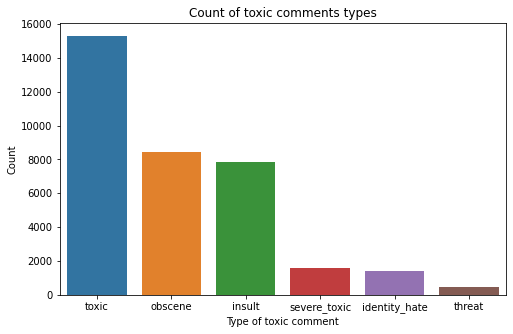

In [ ]:
y_train_dict = labels_dict(y_train)

plot_toxic_levels(y_train_dict)

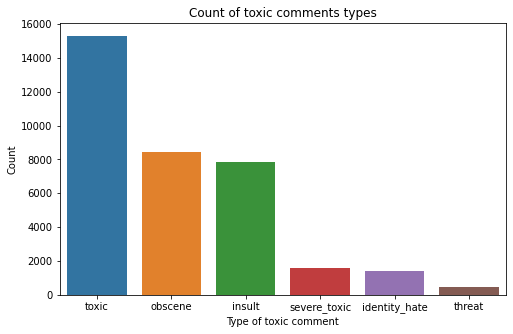

In [ ]:
y_val_dict = labels_dict(y_val)

plot_toxic_levels(y_val_dict)

## Tokenization after splitting the data

In [ ]:
x_train = x_train.astype(str)
x_val = x_val.astype(str)

In [ ]:
#tokanization, using keras
token = Tokenizer()
token.fit_on_texts(x_train)

In [ ]:
#convert to sequence
x_train_dl = token.texts_to_sequences(x_train)
x_val_dl = token.texts_to_sequences(x_val)

In [ ]:
#checking dims
doc_len_list = [len(doc) for doc in x_train_dl]
max(doc_len_list), min(doc_len_list), np.mean(doc_len_list)

(1250, 1, 34.84018769192204)

<AxesSubplot:ylabel='Count'>

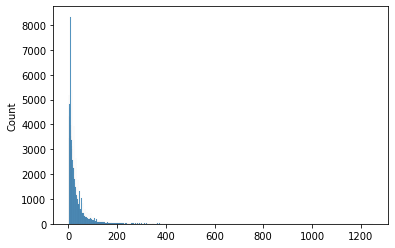

In [ ]:
sns.histplot(doc_len_list)

According to the plot, it seems that most longer comments are around 120 words, so we will use 200 as max word number for our sequence as a start just to be safe.

In [ ]:
max_words = 200

x_train_dl = pad_sequences(x_train_dl, maxlen=max_words)
x_val_dl = pad_sequences(x_val_dl, maxlen=max_words)

In [ ]:
total_words = len(token.word_index) + 1
total_words

181852

In [ ]:
x_test = x_test.astype(str)
x_test_dl = token.texts_to_sequences(x_test)
x_test_dl = pad_sequences(x_test_dl, maxlen=max_words)

# **4. Models**

Thinking about the project as a product, we decided on the following flow:

1. User sends a comment.

2. Classification of the comment as a toxic or non-toxic - binary classification problem.

3. If it's toxic, we'll check the comments' type of toxicity - multilabel classification problem.

# **4.1 Binary Classification**

**First, we would like to check whether a comment is toxic or not.
Next, if the comment was found toxic, we will predict its levels of toxicity.**

For the first stage (binary classification problem) , we'll create a new column: if a comment has some kind of certain level of toxicity then it is toxic and will receive the value 1, and 0 otherwise.


In [ ]:
bin_y_train=y_train.copy()
bin_y_val=y_val.copy()
bin_y_test=y_test.copy()
bin_y_train['is_toxic']=(bin_y_train==1).any(axis=1).astype(int)
bin_y_val['is_toxic']=(bin_y_val==1).any(axis=1).astype(int)
bin_y_test['is_toxic']=(bin_y_test==1).any(axis=1).astype(int)

In [ ]:
bin_y_train=bin_y_train[['is_toxic']]
bin_y_val=bin_y_val[['is_toxic']]
bin_y_test=bin_y_test[['is_toxic']]

# 4.1.1 Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

tuned_rf_model = GridSearchCV(estimator=rf_model,
                        param_grid={'max_features': ['auto', 'sqrt', 'log2', 1/3]},
                        scoring='accuracy',
                        cv=3,
                        verbose=3,
                        refit=True)

In [ ]:
rf_history=tuned_rf_model.fit(x_train_dl, bin_y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .................max_features=auto;, score=0.904 total time= 1.3min
[CV 2/3] END .................max_features=auto;, score=0.903 total time= 1.3min
[CV 3/3] END .................max_features=auto;, score=0.903 total time= 1.3min
[CV 1/3] END .................max_features=sqrt;, score=0.904 total time= 1.3min
[CV 2/3] END .................max_features=sqrt;, score=0.903 total time= 1.3min
[CV 3/3] END .................max_features=sqrt;, score=0.903 total time= 1.3min
[CV 1/3] END .................max_features=log2;, score=0.904 total time=  47.6s
[CV 2/3] END .................max_features=log2;, score=0.903 total time=  47.4s
[CV 3/3] END .................max_features=log2;, score=0.903 total time=  48.4s
[CV 1/3] END ...max_features=0.3333333333333333;, score=0.908 total time= 5.7min
[CV 2/3] END ...max_features=0.3333333333333333;, score=0.907 total time= 5.7min
[CV 3/3] END ...max_features=0.3333333333333333;,

In [ ]:
tuned_rf_model.best_estimator_

RandomForestClassifier(max_features=0.3333333333333333, n_estimators=200,
                       random_state=42)

In [ ]:
#We will define a model with the selected hyper parameters in order not to run the grid search again later
best_param_RF_model = RandomForestClassifier(max_features=0.3333333333333333, n_estimators=200,random_state=42)
rf_fit=best_param_RF_model.fit(x_train_dl, bin_y_train)

In [ ]:
#train accuracy
train_rf_pred = np.round(best_param_RF_model.predict(x_train_dl))
train_rf_acc = str(ac_score(bin_y_train, train_rf_pred))
train_rf_acc

'0.9997649934198157'

In [ ]:
#validation accuracy
val_rf_pred = np.round(best_param_RF_model.predict(x_val_dl))
val_rf_acc = str(ac_score(bin_y_val, val_rf_pred))
val_rf_acc

'0.9091336362212126'

In [ ]:
#test accuracy
test_rf_pred = np.round(best_param_RF_model.predict(x_test_dl))
test_rf_acc = str(ac_score(bin_y_test, test_rf_pred))
print("The accuracy score of the Random Forest model is: " + test_rf_acc )

The accuracy score of the Random Forest model is: 0.9111100690862484


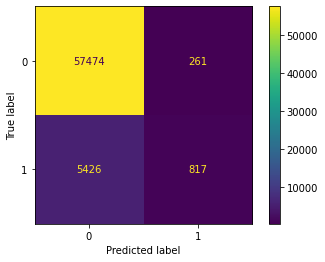

In [ ]:
#plot confusion matrix

mat_display(confusion_matrix(bin_y_test, test_rf_pred)).plot()

# 4.1.2 CNN model for binary classification


In [ ]:
binary_cnn_model = Sequential()
binary_cnn_model.add(Embedding(input_dim=total_words, output_dim=32, input_length=max_words))
binary_cnn_model.add(Conv1D(8, 3, padding='same', activation='relu'))
binary_cnn_model.add(Flatten())
binary_cnn_model.add(Dense(64, activation='relu'))
binary_cnn_model.add(Dropout(0.5))
binary_cnn_model.add(Dense(1, activation='sigmoid')) #in this case we have 1 class (toxic or not), so we need 1 output
binary_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
binary_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           5819264   
                                                                 
 conv1d (Conv1D)             (None, 200, 8)            776       
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                102464    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,922,569
Trainable params: 5,922,569
Non-

In [ ]:
logdir = os.path.join("logs", binary_cnn_model.name)
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

# Empty logdir
if os.path.exists('logs'):
    shutil.rmtree(os.path.join('logs'))
    os.mkdir(os.path.join('logs'))

In [ ]:
save_callback = ModelCheckpoint(binary_cnn_model.name + '.h5', save_best_only=True, monitor='val_accuracy', verbose=1)

In [ ]:
binary_cnn_history=binary_cnn_model.fit(x_train_dl, bin_y_train, validation_data=(x_val_dl, bin_y_val), epochs=10, batch_size=10, callbacks=[tensorboard_callback, save_callback])

Epoch 1/10
12759/12766 [============================>.] - ETA: 0s - loss: 0.1576 - accuracy: 0.9444
Epoch 1: val_accuracy improved from -inf to 0.96074, saving model to sequential.h5
12766/12766 [==============================] - 137s 10ms/step - loss: 0.1577 - accuracy: 0.9444 - val_loss: 0.1162 - val_accuracy: 0.9607
Epoch 2/10
12755/12766 [============================>.] - ETA: 0s - loss: 0.0856 - accuracy: 0.9695
Epoch 2: val_accuracy did not improve from 0.96074
12766/12766 [==============================] - 60s 5ms/step - loss: 0.0856 - accuracy: 0.9695 - val_loss: 0.1136 - val_accuracy: 0.9604
Epoch 3/10
12756/12766 [============================>.] - ETA: 0s - loss: 0.0586 - accuracy: 0.9796
Epoch 3: val_accuracy did not improve from 0.96074
12766/12766 [==============================] - 57s 4ms/step - loss: 0.0586 - accuracy: 0.9796 - val_loss: 0.1551 - val_accuracy: 0.9560
Epoch 4/10
12760/12766 [============================>.] - ETA: 0s - loss: 0.0356 - accuracy: 0.9881
Epoch

In [ ]:
pred_binary_cnn = np.round(binary_cnn_model.predict(x_test_dl))
Bin_CNN_acc=str(ac_score(bin_y_test, pred_binary_cnn))
print("The accuracy score of our 1D CNN binary is: " + Bin_CNN_acc )

2000/2000 [==============================] - 3s 2ms/step
The accuracy score of our 1D CNN binary is: 0.8914783206727313


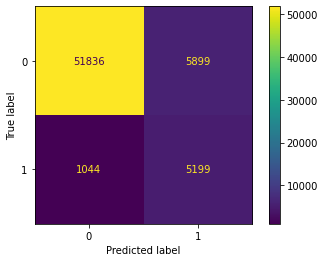

In [ ]:
mat_display(confusion_matrix(bin_y_test, pred_binary_cnn)).plot()

We can see that both models yield roughly the same resaults, but the CNN model is a lot faster - so we will use it.

# **4.2 Multi Label Classification**

**Now, we'll build a model to classify the toxicity levels for a comment**

# 4.2.1 CNN model for multilabel classification

In [ ]:
#we will use this function to plot confusion matricies for our models

def plot_individual_matrix(test, pred, model, lst):
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
  fig.suptitle("Individual Confusion Matricies for " + model + " Model",fontsize=20, fontweight='bold')

  mat1 = mcm(test, pred)

  mat_display(mat1[0],).plot(ax=axes[0, 0], include_values=True, cmap="viridis", xticks_rotation="vertical")
  axes[0][0].set_title('Label: ' + lst[0])
  mat_display(mat1[1],).plot(ax=axes[0][1], include_values=True, cmap="viridis", xticks_rotation="vertical")
  axes[0][1].set_title('Label: ' + lst[1])
  mat_display(mat1[2],).plot(ax=axes[0][2], include_values=True, cmap="viridis", xticks_rotation="vertical")
  axes[0][2].set_title('Label: ' + lst[2])
  mat_display(mat1[3],).plot(ax=axes[1][0], include_values=True, cmap="viridis", xticks_rotation="vertical")
  axes[1][0].set_title('Label: ' + lst[3])
  mat_display(mat1[4],).plot(ax=axes[1][1], include_values=True, cmap="viridis", xticks_rotation="vertical")
  axes[1][1].set_title('Label: ' + lst[4])
  mat_display(mat1[5],).plot(ax=axes[1][2], include_values=True, cmap="viridis", xticks_rotation="vertical")
  axes[1][2].set_title('Label: ' + lst[5])
  plt.show()

Building our CNN

In [ ]:
multi_cnn_model = Sequential()
multi_cnn_model.add(Embedding(input_dim=total_words, output_dim=32, input_length=max_words))
multi_cnn_model.add(Conv1D(64, 3, padding='same', activation='relu'))
multi_cnn_model.add(Flatten())
multi_cnn_model.add(Dense(64, activation='relu'))
multi_cnn_model.add(Dropout(0.5))
multi_cnn_model.add(Dense(6, activation='sigmoid')) #we have 6 classes, so we need 6 outputs
multi_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
multi_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           5819264   
                                                                 
 conv1d_1 (Conv1D)           (None, 200, 64)           6208      
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                819264    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 6,645,126
Trainable params: 6,645,126
No

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True)
]

In [ ]:
if not os.path.exists(checkpoint_filepath):
 history_multi_cnn_model =multi_cnn_model.fit(x_train_dl, y_train, validation_data=(x_val_dl, y_val), callbacks=callbacks, epochs=5, batch_size=64)

Epoch 1/5
1995/1995 [==============================] - ETA: 0s - loss: 0.0828 - accuracy: 0.8364

1995/1995 [==============================] - 101s 50ms/step - loss: 0.0828 - accuracy: 0.8364 - val_loss: 0.0548 - val_accuracy: 0.9944
Epoch 2/5
1995/1995 [==============================] - ETA: 0s - loss: 0.0488 - accuracy: 0.9761

1995/1995 [==============================] - 23s 11ms/step - loss: 0.0488 - accuracy: 0.9761 - val_loss: 0.0541 - val_accuracy: 0.9944
Epoch 3/5
1995/1995 [==============================] - 15s 7ms/step - loss: 0.0397 - accuracy: 0.9774 - val_loss: 0.0641 - val_accuracy: 0.9932
Epoch 4/5
1995/1995 [==============================] - 12s 6ms/step - loss: 0.0343 - accuracy: 0.9599 - val_loss: 0.0746 - val_accuracy: 0.9944
Epoch 5/5
1995/1995 [==============================] - 12s 6ms/step - loss: 0.0303 - accuracy: 0.9168 - val_loss: 0.0758 - val_accuracy: 0.9938


In [ ]:
pred_multi_cnn = np.round(multi_cnn_model.predict(x_test_dl))
mul_CNN_acc=str(ac_score(y_test, pred_multi_cnn))
print("The accuracy score of our 1D CNN multilabel is: " + mul_CNN_acc )

2000/2000 [==============================] - 3s 2ms/step
The accuracy score of our 1D CNN multilabel is: 0.8484322735940479


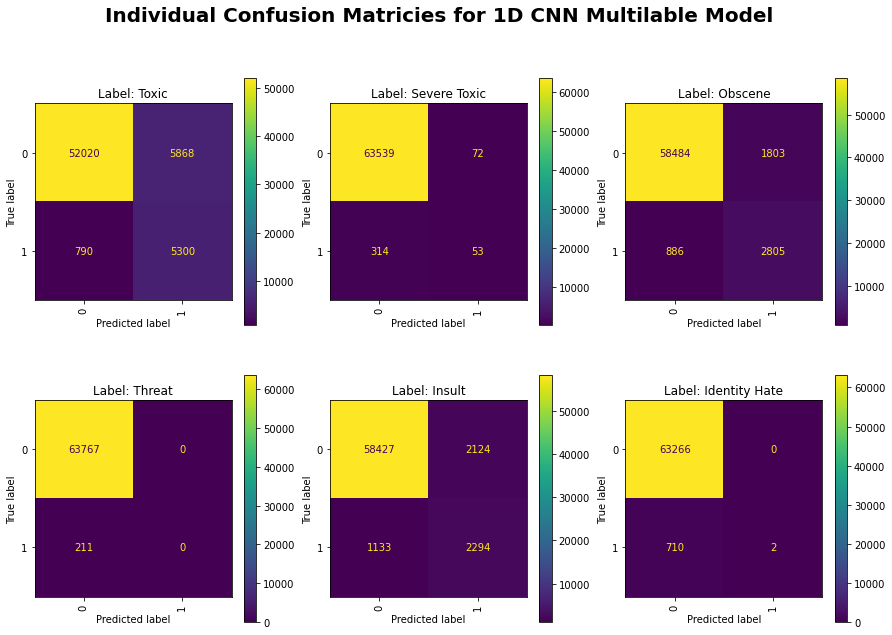

In [ ]:
plot_individual_matrix(y_test, pred_multi_cnn, '1D CNN Multilable', labels_lst)

We can see that the two problematic labels are "threat" and "identity hate". We can think of a few reasons for that:


1.  Lack of examples for these labels: we don't have enough comments tagged as "threat" or "identity hate"
2.  It might have been classified as a different kind of toxicity: many of those comments had multiple labels and they were probably tagged as one of the easier labels to predict.
3.  Intonation & cultural context: threats often depend on intonation, which is hard to detacte in a text, and identity hate is very culture specific.




Some important formulas:

* Precision = (True Positive) / (True Positive + False Positive)
* Recall = (True Positive) / (True Positive + False Negative)
* F1-score = 2 [(Recall * Precision) / (Recall + Precision)]
* Support = Number of actuall occurrences of the class in the dataset
* Micro Avg = Σ TP_i / Σ (TP_i + FP_i)
* Macro Avg = Σ Precision_i / N
* Weighted Avg = mean of per-class F1-score, considering each class supports



In [ ]:
print(classification_report(y_test, pred_multi_cnn,target_names=labels_lst))

               precision    recall  f1-score   support

        Toxic       0.47      0.87      0.61      6090
 Severe Toxic       0.42      0.14      0.22       367
      Obscene       0.61      0.76      0.68      3691
       Threat       0.00      0.00      0.00       211
       Insult       0.52      0.67      0.58      3427
Identity Hate       1.00      0.00      0.01       712

    micro avg       0.51      0.72      0.60     14498
    macro avg       0.50      0.41      0.35     14498
 weighted avg       0.54      0.72      0.57     14498
  samples avg       0.07      0.07      0.07     14498



# 4.2.2 LSTM model for multilabel classification

LSTM model based on lecture week 8

In [ ]:
#model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=total_words, output_dim=32, input_length=max_words))
lstm_model.add(LSTM(200, dropout=0.3))
lstm_model.add(Dense(6, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           5819264   
                                                                 
 lstm (LSTM)                 (None, 200)               186400    
                                                                 
 dense_4 (Dense)             (None, 6)                 1206      
                                                                 
Total params: 6,006,870
Trainable params: 6,006,870
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
lstm1_checkpoint_filepath = '/tmp/lstm1_checkpoint'

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=lstm1_checkpoint_filepath, save_best_only=True)
]

In [ ]:
if not os.path.exists(lstm1_checkpoint_filepath):
  history_lstm_model=lstm_model.fit(x_train_dl, y_train, validation_data=(x_val_dl, y_val), callbacks=callbacks, epochs=5, batch_size=64)

Epoch 1/5
1995/1995 [==============================] - ETA: 0s - loss: 0.1072 - accuracy: 0.9860

1995/1995 [==============================] - 89s 43ms/step - loss: 0.1072 - accuracy: 0.9860 - val_loss: 0.0736 - val_accuracy: 0.9944
Epoch 2/5
1995/1995 [==============================] - ETA: 0s - loss: 0.0559 - accuracy: 0.9941

1995/1995 [==============================] - 34s 17ms/step - loss: 0.0559 - accuracy: 0.9941 - val_loss: 0.0562 - val_accuracy: 0.9944
Epoch 3/5
1995/1995 [==============================] - ETA: 0s - loss: 0.0465 - accuracy: 0.9940

1995/1995 [==============================] - 31s 15ms/step - loss: 0.0465 - accuracy: 0.9940 - val_loss: 0.0535 - val_accuracy: 0.9943
Epoch 4/5
1995/1995 [==============================] - 23s 12ms/step - loss: 0.0412 - accuracy: 0.9938 - val_loss: 0.0581 - val_accuracy: 0.9935
Epoch 5/5
1995/1995 [==============================] - 23s 12ms/step - loss: 0.0374 - accuracy: 0.9935 - val_loss: 0.0557 - val_accuracy: 0.9914


In [ ]:
pred_lstm = np.round(lstm_model.predict(x_test_dl))
LSTM_acc= str(ac_score(y_test, pred_lstm))
print("The accuracy score of our LSTM is: " +LSTM_acc)

2000/2000 [==============================] - 8s 4ms/step
The accuracy score of our LSTM is: 0.877707962111976


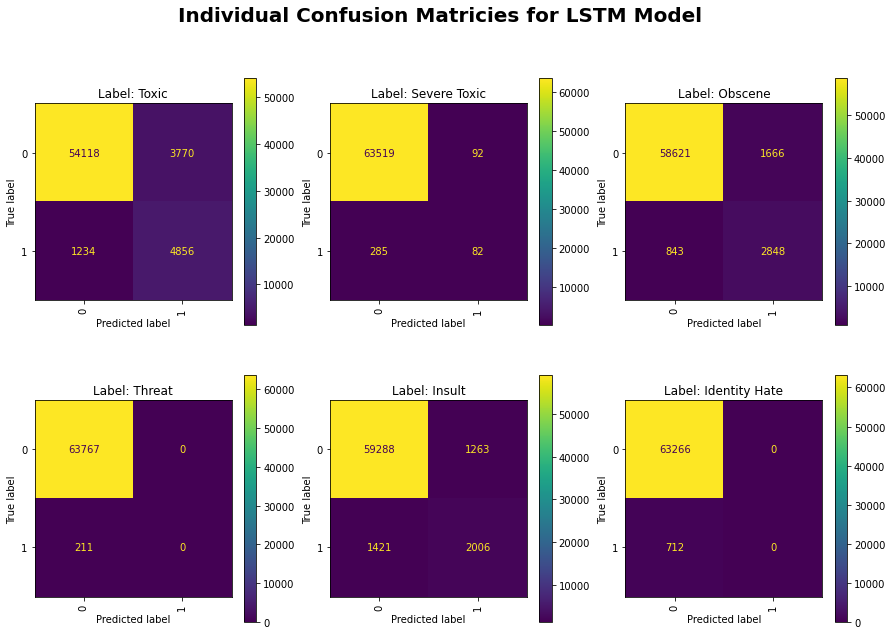

In [ ]:
plot_individual_matrix(y_test, pred_lstm, 'LSTM', labels_lst)

We can see we get a very similar confusion matrix, so our conclusions remain the same.

In [ ]:
print(classification_report(y_test, pred_lstm,target_names=labels_lst))

               precision    recall  f1-score   support

        Toxic       0.56      0.80      0.66      6090
 Severe Toxic       0.47      0.22      0.30       367
      Obscene       0.63      0.77      0.69      3691
       Threat       0.00      0.00      0.00       211
       Insult       0.61      0.59      0.60      3427
Identity Hate       0.00      0.00      0.00       712

    micro avg       0.59      0.68      0.63     14498
    macro avg       0.38      0.40      0.38     14498
 weighted avg       0.55      0.68      0.60     14498
  samples avg       0.07      0.06      0.06     14498



# **5. Models Evaluation**

Let's compare for both types of models (binary models and multilabel-models) the results of their models.

**For binary models**

In [ ]:
#creat a list of the accuracy scores
binary_acc_list = [float(Bin_CNN_acc),float(test_rf_acc)]

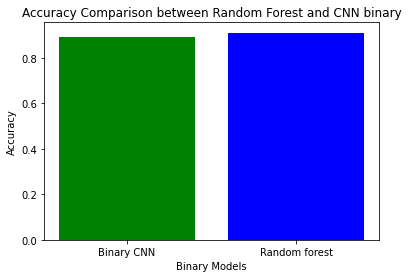

In [ ]:
# create a bar graph with the model names on the x-axis and the accuracy values on the y-axis

plt.bar(['Binary CNN','Random forest'], binary_acc_list, color=['green', 'blue'])

# add axis labels and title
plt.xlabel('Binary Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Random Forest and CNN binary')

# display the graph
plt.show()

**For multilabel models**

In [ ]:
multi_acc_list = [float(mul_CNN_acc), float(LSTM_acc)]

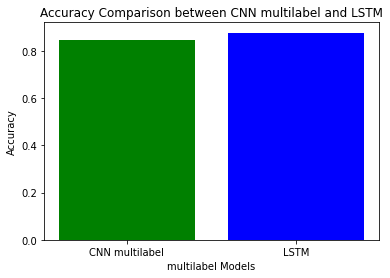

In [ ]:
# create a bar graph with the model names on the x-axis and the accuracy values on the y-axis
plt.bar(['CNN multilabel', 'LSTM'], multi_acc_list,color=['green', 'blue'])

# add axis labels and title
plt.xlabel('multilabel Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between CNN multilabel and LSTM')

# display the graph
plt.show()



*   Both models reached a high level of accuracy of over 85%.
*   The LSTM model got a slightly better result.
*   Despite this, the results from the confusion matrixes of each model shows that both models had difficulty learn the same two levels of toxicity - threat and identity hate.


for multilabel models, we can visualizing training accuracy vs. validation accuracy over a number of epochs

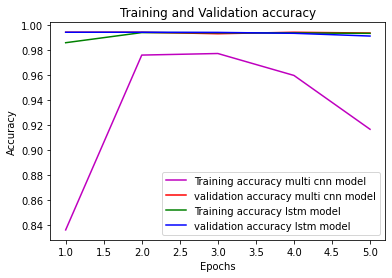

In [ ]:
train_accuracy_multi_cnn_model = history_multi_cnn_model.history['accuracy']
val_accuracy_multi_cnn_model = history_multi_cnn_model.history['val_accuracy']
train_accuracy_lstm_model = history_lstm_model.history['accuracy']
val_accuracy_lstm_model = history_lstm_model.history['val_accuracy']

epochs = range(1,6)
plt.plot(epochs, train_accuracy_multi_cnn_model, 'm', label='Training accuracy multi cnn model')
plt.plot(epochs, val_accuracy_multi_cnn_model, 'r', label='validation accuracy multi cnn model')
plt.plot(epochs, train_accuracy_lstm_model, 'g', label='Training accuracy lstm model')
plt.plot(epochs, val_accuracy_lstm_model, 'b', label='validation accuracy lstm model')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can see in the graph the same thing we saw while training our models - after about 2-3 epochs the train validation of the 1D CNN stopped improving. We suspected it is a sign for underfitting, but stopping the network after only 2 epochs seemed as not long enough time for training.

# **6. Summary**

In [ ]:
# generate the summary table

results = {'model': ['Random Forest', 'CNN binary', 'CNN multilabel', 'LSTM'],
           'Test score (Accuracy)': [str(test_rf_acc), str(Bin_CNN_acc), str(mul_CNN_acc), str(LSTM_acc)],
           'Train score (Accuracy)': [str(train_rf_acc), str(binary_cnn_history.history['accuracy'][-1]), str(history_multi_cnn_model.history['accuracy'][-1]),
            str(history_lstm_model.history['accuracy'][-1])],
           'Number of trainable parameters': ['NONE', '5,922,569', '6,645,126', '6,006,870'],
           'Number of layers': ['NONE', len(binary_cnn_model.layers), len(multi_cnn_model.layers), len(lstm_model.layers)],
           'Regularization methods': ['None', 'Dropout','Dropout', 'None (other than the ones implemented in the transfered model)'],
           'Number of epochs': ['NONE', 10 , 5 , 5],
           'Loss function': ['NONE', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy'],
           'Optimizer': ['NONE', 'adam', 'adam', 'adam']
           }

df = pd.DataFrame(results)
df

,model,Test score (Accuracy),Train score (Accuracy),Number of trainable parameters,Number of layers,Regularization methods,Number of epochs,Loss function,Optimizer
0,Random Forest,0.9111100690862484,0.9997649934198157,NONE,NONE,None,NONE,NONE,NONE
1,CNN binary,0.8914783206727313,0.9978692531585693,"5,922,569",6,Dropout,10,binary_crossentropy,adam
2,CNN multilabel,0.8484322735940479,0.9168311953544617,"6,645,126",6,Dropout,5,binary_crossentropy,adam
3,LSTM,0.877707962111976,0.993513822555542,"6,006,870",3,None (other than the ones implemented in the t...,5,binary_crossentropy,adam


**Saving the best models for prediction**

In [ ]:
binary_cnn_model.save('toxicity_binary.h5')

In [ ]:
lstm_model.save('toxicity.h5')

# **7. Predicting new comments from users**

As a final step, we wanted to create a user interface where a user could write a comment and then it would be classified in the two steps according to the selected models we built.

In [ ]:
#preprocessing the comment from the user
def prepare_comment(user_input):
  # comment pre-processing
  user_comment = clean_text(user_input)
  user_comment = remove_stopwords(user_comment)
  # convert to df
  values = {'comment':  [user_comment]}
  df = pd.DataFrame(values)
  # tokenize
  comment_dl = token.texts_to_sequences(df['comment'])
  # vectorize
  comment_dl = pad_sequences(comment_dl, maxlen=max_words)
  return comment_dl

In [ ]:
#loading the chosen models
binary_model = tf.keras.models.load_model('toxicity_binary.h5')
model = tf.keras.models.load_model('toxicity.h5')

In [ ]:
def score_comment(comment):
    comment = prepare_comment(comment) # comment pre-processing
    is_toxic = binary_model.predict(comment)
    results = model.predict(comment)
    text = ''
    if is_toxic>0.5:
      text += 'Your comment is toxic and thus will not be publisehd\n'
      for idx, col in enumerate(labels_lst):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    else:
      text += 'Your comment is non-toxic and can be published\n'
    return text

In [ ]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [ ]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://51ca3b4b4e7592dcfb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
